In [1]:
import sys
sys.path.append("..") #import folder which is one level higher

import matplotlib.pyplot as plt
import os
import pandas as pd

#import self-made functions
from classes import SLR_Scenario, SurgeHeight

#### Prepare the SLR projections

In [2]:
SLR_path = os.path.join('','..','SLR_projections')
#Load the SLR projections
# Load all SLR_Scenario
all_scenarios = []
for filename in os.listdir(SLR_path):
    if filename.endswith(".csv"):
        obj = SLR_Scenario(filename.split('.')[0]) #Init object with name derived from filename
        filepath = os.path.join(SLR_path,filename)
        obj.from_csv(filepath) #Fill the object with data from the csv file
        all_scenarios.append(obj)

In [3]:
#Add parts of the name as attributes
authors = ['LeBars','SROCC']
RCPs = ['RCP26','RCP45','RCP85']
for scenario in all_scenarios:
    scenario.author = scenario.name.split('_')[0]
    scenario.rcp = scenario.name.split('_')[2]
    scenario.prob = scenario.name.split('_')[3]

In [4]:
dct = {}
for scenario in all_scenarios:
    dct[scenario.name] = scenario
    print(scenario.name)

LeBars_2017_RCP45_05
LeBars_2017_RCP45_95
LeBars_2017_RCP45_med
LeBars_2017_RCP85_05
LeBars_2017_RCP85_95
LeBars_2017_RCP85_med
SROCC_2019_RCP26_17
SROCC_2019_RCP26_50
SROCC_2019_RCP26_83
SROCC_2019_RCP45_17
SROCC_2019_RCP45_50
SROCC_2019_RCP45_83
SROCC_2019_RCP85_17
SROCC_2019_RCP85_50
SROCC_2019_RCP85_83


#### Prepare the storm surge heights

In [6]:
SH_path = os.path.join('','..','SurgeHeight')
all_SH = []
for filename in os.listdir(SH_path):
    if filename.endswith(".csv"):
        obj = SurgeHeight(filename.split('.')[0]) #Init object with name derived from filename
        filepath = os.path.join(SH_path,filename)
        obj.from_csv(filepath) #Fill the object with data from the csv file
        all_SH.append(obj)

#### Make the plot

Text(0, 0.5, 'Storm surge height at Hoek van Holland (m)')

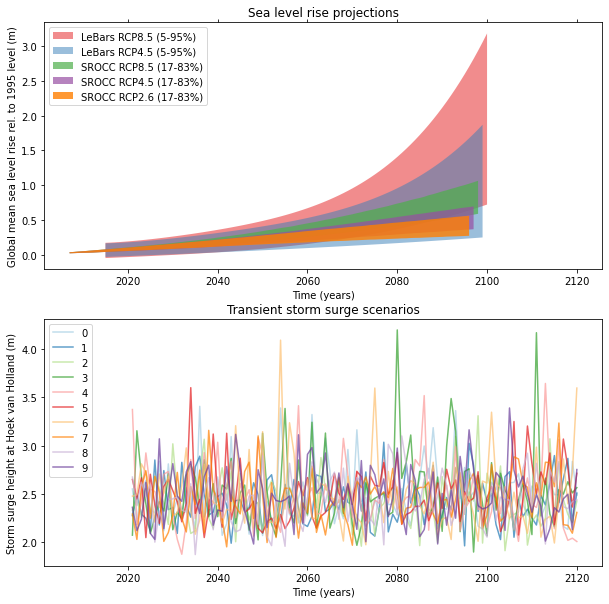

In [34]:
fig, (ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(10,10))

colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00']
#colors2 = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854']
colors3 = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']

#SEA LEVEL RISE SCENARIOS
ax1.fill_between(dct['LeBars_2017_RCP85_05'].years,dct['LeBars_2017_RCP85_05'].sealevel,dct['LeBars_2017_RCP85_95'].sealevel,label='LeBars RCP8.5 (5-95%)',facecolor=colors[0],alpha=.5)
#ax1.plot(dct['LeBars_2017_RCP85_med'].years,dct['LeBars_2017_RCP85_med'].sealevel,color=c1,alpha=0.5)

ax1.fill_between(dct['LeBars_2017_RCP45_05'].years[:-1],dct['LeBars_2017_RCP45_05'].sealevel[:-1],dct['LeBars_2017_RCP45_95'].sealevel[:-1],label='LeBars RCP4.5 (5-95%)',facecolor=colors[1],alpha=.5)
#ax1.plot(dct['LeBars_2017_RCP45_med'].years[:-2],dct['LeBars_2017_RCP45_med'].sealevel[:-2],color=c2,alpha=0.5)


ax1.fill_between(dct['SROCC_2019_RCP85_17'].years[:-2],dct['SROCC_2019_RCP85_17'].sealevel[:-2],dct['SROCC_2019_RCP85_83'].sealevel[:-2],label='SROCC RCP8.5 (17-83%)',facecolor=colors[2],alpha=.7)
#ax1.plot(dct['SROCC_2019_RCP85_17'].years[:-2],dct['LeBars_2017_RCP45_med'].sealevel[:-2],color=c2,alpha=0.5)

ax1.fill_between(dct['SROCC_2019_RCP45_17'].years[:-3],dct['SROCC_2019_RCP45_17'].sealevel[:-3],dct['SROCC_2019_RCP45_83'].sealevel[:-3],label='SROCC RCP4.5 (17-83%)',facecolor=colors[3],alpha=.7)

ax1.fill_between(dct['SROCC_2019_RCP26_17'].years[:-4],dct['SROCC_2019_RCP26_17'].sealevel[:-4],dct['SROCC_2019_RCP26_83'].sealevel[:-4],label='SROCC RCP2.6 (17-83%)',facecolor=colors[4],alpha=.8)
ax1.legend(loc='upper left')
ax1.tick_params(axis='x',reset=True)
ax1.set_title('Sea level rise projections')
ax1.set_xlabel('Time (years)')
ax1.set_ylabel('Global mean sea level rise rel. to 1995 level (m)')

#STORM SURGE HEIGHTS
for i,SH in enumerate(all_SH):
    ax2.plot(SH.years,SH.surgeheight,label=SH.name,alpha=0.7,color=colors3[i])
ax2.legend()
ax2.set_title('Transient storm surge scenarios')
ax2.set_xlabel('Time (years)')
ax2.set_ylabel('Storm surge height at Hoek van Holland (m)')

In [37]:
fig.savefig('Waterlevel_scenarios.png',bbox_inches='tight',dpi=150)